# Power System Planning First Assignment

In [1]:
import pandapower as pp
import pandapower.plotting as plot
import pandapower.shortcircuit as sc
from pandapower.plotting import cmap_discrete, create_bus_collection, draw_collections
net = pp.create_empty_network()
#Create Busses
b1 = pp.create_bus(net, name='B1', vn_kv=110)
b2 = pp.create_bus(net, name='B2', vn_kv=20)
b3 = pp.create_bus(net, name='B3', vn_kv=20)
b4 = pp.create_bus(net, name='B4', vn_kv=20)
b5 = pp.create_bus(net, name='B5', vn_kv=20)
b6 = pp.create_bus(net, name='B6', vn_kv=20)

b41 = pp.create_bus(net, name='B41',  vn_kv=0.4)
b51 = pp.create_bus(net, name='B51',  vn_kv=0.4)
b61 = pp.create_bus(net, name='B61',  vn_kv=0.4)
#external grid
pp.create_ext_grid(net, b1, rx_min=0.2, rx_max=0.35, s_sc_min_mva=80, s_sc_max_mva=100)#Missing Paramters

#create transformers
t1 = pp.create_transformer(net, b1, b2, name='T1', std_type="25 MVA 110/20 kV")
t2 = pp.create_transformer(net, b4, b41, name='T2',std_type="0.4 MVA 20/0.4 kV")
t3 = pp.create_transformer(net, b5, b51, name='T3',std_type="0.4 MVA 20/0.4 kV")
t4 = pp.create_transformer(net, b6, b61, name='T4',std_type="0.4 MVA 20/0.4 kV")

#load - motor
pp.create_sgen(net, b3, p_mw=-3, q_mvar=1, sn_mva=10, type="motor", rx=7, k= 1.2) 

houses = []

nextBus = b41
for i in range(1,10):
    newBus = pp.create_bus(net, vn_kv=0.4, name="B4" + str(i))
    pp.create_line(net, nextBus, newBus, 0.1, "48-AL1/8-ST1A 0.4")
    nextBus = newBus
    load = pp.create_load_from_cosphi(net, nextBus, 0.0022, 0.95, "overexcited")
    houses.append(load)

nextBus = b51
for i in range(1,10):
    newBus = pp.create_bus(net, vn_kv=0.4, name="B5" + str(i))
    pp.create_line(net, nextBus, newBus, 0.1, "48-AL1/8-ST1A 0.4")
    nextBus = newBus
    load = pp.create_load_from_cosphi(net, nextBus, 0.0022, 0.95, "overexcited")
    houses.append(load)

nextBus = b61
for i in range(1,10):
    newBus = pp.create_bus(net, vn_kv=0.4, name="B6" + str(i))
    pp.create_line(net, nextBus, newBus, 0.1, "48-AL1/8-ST1A 0.4")
    nextBus = newBus
    load = pp.create_load_from_cosphi(net, nextBus, 0.0022, 0.95, "overexcited")
    houses.append(load)

#lines

pp.create_line(net, b2, b3, 5, "NA2XS2Y 1x95 RM/25 12/20 kV")
pp.create_line(net, b2, b4, 6, "NA2XS2Y 1x95 RM/25 12/20 kV")
pp.create_line(net, b2, b5, 7, "NA2XS2Y 1x95 RM/25 12/20 kV")
pp.create_line(net, b2, b6, 6, "NA2XS2Y 1x95 RM/25 12/20 kV")

30

In [2]:
net.bus

,name,vn_kv,type,zone,in_service
0,B1,110.0,b,None,True
1,B2,20.0,b,None,True
2,B3,20.0,b,None,True
3,B4,20.0,b,None,True
4,B5,20.0,b,None,True
5,B6,20.0,b,None,True
6,B41,0.4,b,None,True
7,B51,0.4,b,None,True
8,B61,0.4,b,None,True
9,B41,0.4,b,None,True


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


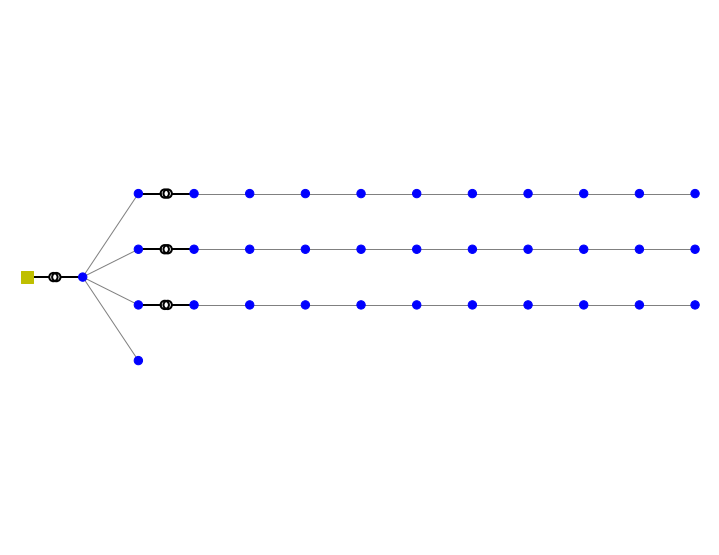

<AxesSubplot:>

In [3]:
# simple plot of net with existing geocoordinates
plot.simple_plot(net, show_plot=True)

# 2.2 Tasks
## 1) Model the test system in pandapower2.
### a. What is the type of the 20 kV lines used? What information can you find from manufacturers? Is this typical for MV systems?
It's an aluminum cable. By the look of it, it is standart to use aluminum cable for these type of lines, probably because of the much higher cost of copper in comparison to aluminum. The information from the manufacturer include how much energy is released, if burned, the weight per length, which is also split between aluminium and copper, as well as the allowed short circuit current for one second. 
### b. What is the type of the 400 V lines used? What information can you find from manufacturers? Is this typical for LV systems?
It's an aluminum cable. There are several informations given including the dc resistance and the rated current continued use. The amount of strands in the cable and the amount of those cables used. Yes it is.
### c. Is this a radial or meshed system? Is this typical for distribution networks? Why?
This is a radial supply system. The power is distributed from one main point outwards over a signle line to several costumers. The fault in one line would result in the power outage for several cotumers.

In [4]:
pp.runpp(net)
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-3.118309,1.591058
1,1.007262,-0.863935,0.000000,0.000000
2,0.997217,-1.384532,3.000000,-1.000000
3,1.007340,-0.889711,0.000000,0.000000
4,1.007384,-0.898267,0.000000,0.000000
5,1.007340,-0.889711,0.000000,0.000000
6,1.007482,-1.066334,0.000000,0.000000
7,1.007527,-1.074876,0.000000,0.000000
8,1.007482,-1.066334,0.000000,0.000000
9,1.001475,-1.396944,0.002090,-0.000687


In [5]:
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,3.118309,-1.591058,-3.102202,1.660297,0.016106,0.069240,0.018374,0.100840,1.000000,0.000000,1.007262,-0.863935,14.003036
1,0.020725,-0.005853,-0.019339,0.005916,0.001385,0.000063,0.000617,0.028974,1.007340,-0.889711,1.007482,-1.066334,5.344644
2,0.020725,-0.005853,-0.019339,0.005916,0.001385,0.000063,0.000617,0.028973,1.007384,-0.898267,1.007527,-1.074876,5.344427
3,0.020725,-0.005853,-0.019339,0.005916,0.001385,0.000063,0.000617,0.028974,1.007340,-0.889711,1.007482,-1.066334,5.344644


In [6]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,0.019339,-0.005916,-0.019190,0.005991,0.000150,7.549266e-05,0.028974,0.028974,0.028974,1.007482,-1.066334,1.001475,-1.396944,13.797167
1,0.017100,-0.005304,-0.016981,0.005364,0.000119,5.986342e-05,0.025804,0.025804,0.025804,1.001475,-1.396944,0.996143,-1.694165,12.287463
2,0.014891,-0.004677,-0.014800,0.004723,0.000091,4.597358e-05,0.022616,0.022616,0.022616,0.996143,-1.694165,0.991485,-1.956852,10.769605
3,0.012710,-0.004036,-0.012643,0.004070,0.000067,3.385977e-05,0.019414,0.019414,0.019414,0.991485,-1.956852,0.987498,-2.183984,9.244565
4,0.010553,-0.003383,-0.010506,0.003407,0.000047,2.355414e-05,0.016198,0.016198,0.016198,0.987498,-2.183984,0.984179,-2.374665,7.713335
5,0.008416,-0.002720,-0.008386,0.002735,0.000030,1.508420e-05,0.012972,0.012972,0.012972,0.984179,-2.374665,0.981526,-2.528138,6.176922
6,0.006296,-0.002048,-0.006279,0.002056,0.000017,8.472666e-06,0.009736,0.009736,0.009736,0.981526,-2.528138,0.979538,-2.643788,4.636347
7,0.004189,-0.001369,-0.004182,0.001373,0.000008,3.737346e-06,0.006495,0.006495,0.006495,0.979538,-2.643788,0.978214,-2.721149,3.092641
8,0.002092,-0.000686,-0.002090,0.000687,0.000002,8.910242e-07,0.003248,0.003248,0.003248,0.978214,-2.721149,0.977552,-2.759907,1.546844
9,0.019339,-0.005916,-0.019190,0.005991,0.000150,7.548570e-05,0.028973,0.028973,0.028973,1.007527,-1.074876,1.001519,-1.405456,13.796532


## 2) Run a power flow and display all the bus voltages, line currents, and transformer loadings.
### a. Are there any violations of voltage, line, or transformers?
No there are not. All Maximums have a lot of capacity to spare. The bus voltages are at most 2% away from their target
### b. Create and display a colormap of the buses showing blue for all voltages below 0.95, green for voltages between 0.95 and 1.05, and red for all voltages above 1.05 pu.

<AxesSubplot:>

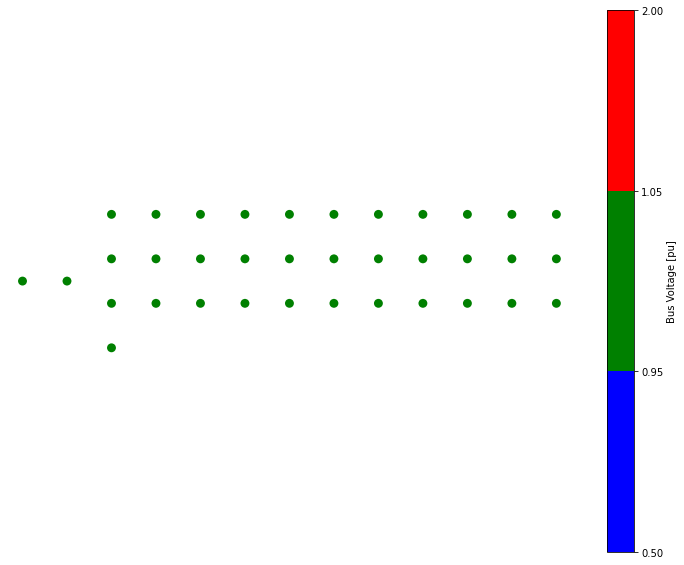

In [7]:
cmap_list = [((0.5, 0.95), "blue"), ((0.95, 1.05), "green"), ((1.05, 2), "red")]
cmap, norm = cmap_discrete(cmap_list)
lc = create_bus_collection(net, cmap=cmap, norm=norm, size=0.1)
draw_collections([lc])

## 3) Consider that the power consumption of eery houshold is increased to 4kW at 0.95 power factor and solve the power flow.
### a. Are there any violations of voltage, line or transformers?
### b. Create and display a colormap of the buses showing blue for all voltages below 0.95, green for voltages between 0.95 and 1.05, and red for all voltages above 1.05 pu.

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot:>

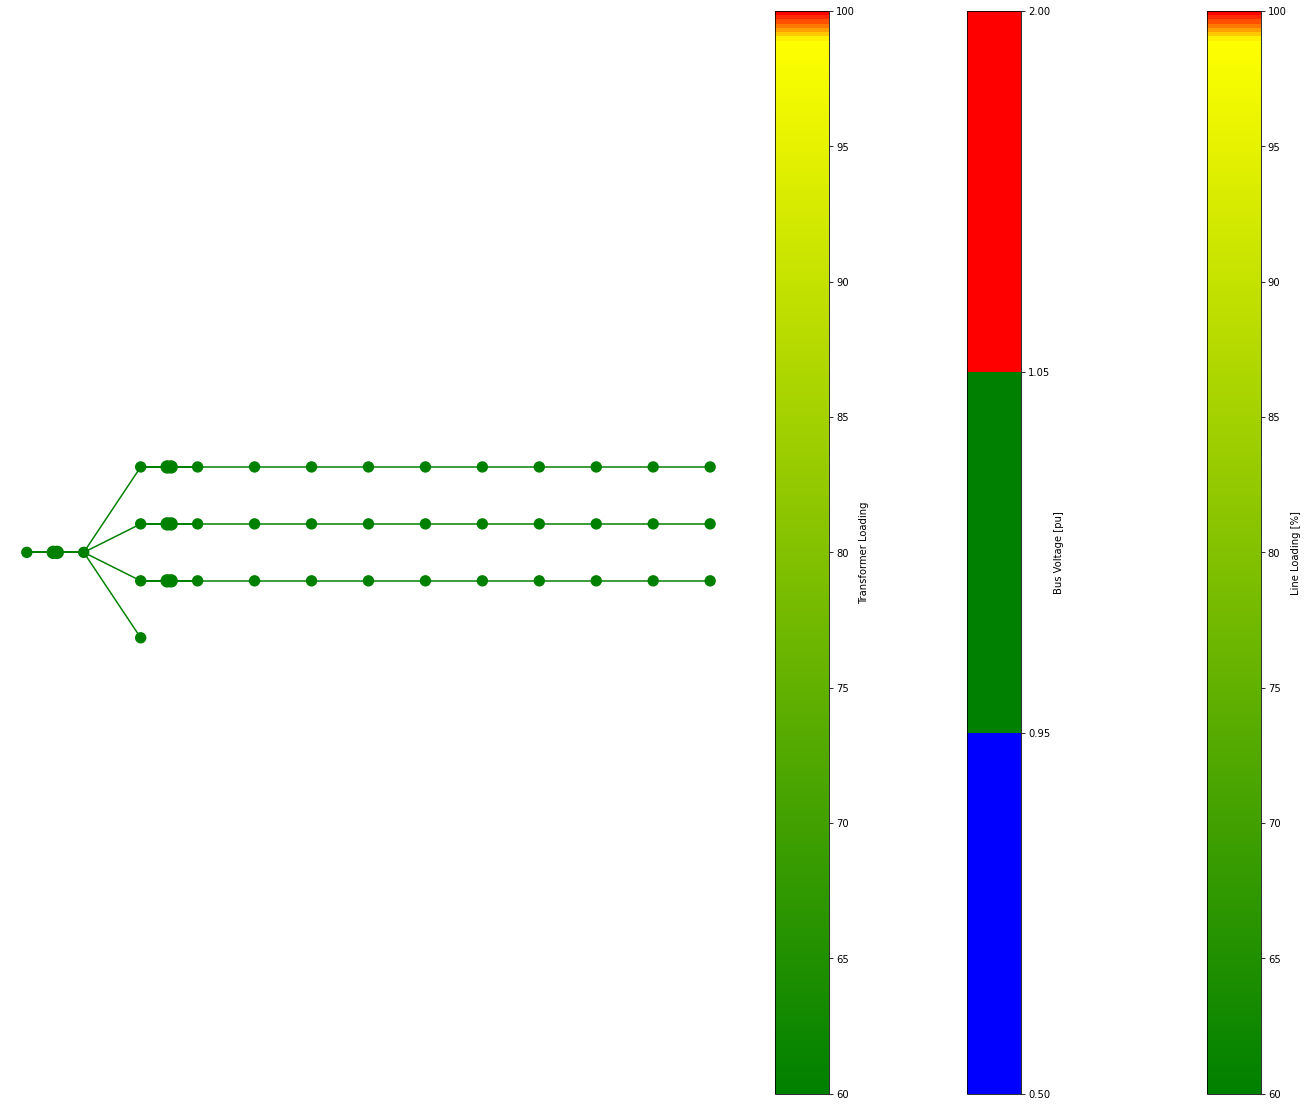

In [8]:

for x in range(len(net.load)):
    #Powerfactor stays the same, we can adjust the scaling to move the drawn power to the requested amount
    net.load.at[x, 'scaling'] = 0.004/0.0022

pp.runpp(net)

cmap_list = [((0.5, 0.95), "blue"), ((0.95, 1.05), "green"), ((1.05, 2), "red")]
cmap, norm = cmap_discrete(cmap_list)
bc = create_bus_collection(net, cmap=cmap, norm=norm, size=0.1)

cmap_list = [(60, "green"), ( 99, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
lc = plot.create_line_collection(net, cmap=cmap, norm=norm)

cmap_list = [(60, "green"), ( 99, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
tc = plot.create_trafo_collection(net, cmap=cmap, norm=norm, size=0.1)
draw_collections([lc,bc,tc], figsize=(20,16))

No there aren't any violations as can be seen by the green color throught the diagramm.

## 4) If we consider that each house will purchase an electric vehicle with a 7 kW charger (in addition to their normal 2 kW with PF=0.95 load) and they want to charge at the same time.
### a. Is the system able to withstand this load?
### b. If no, propose some solutions to alleviate the problem.

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


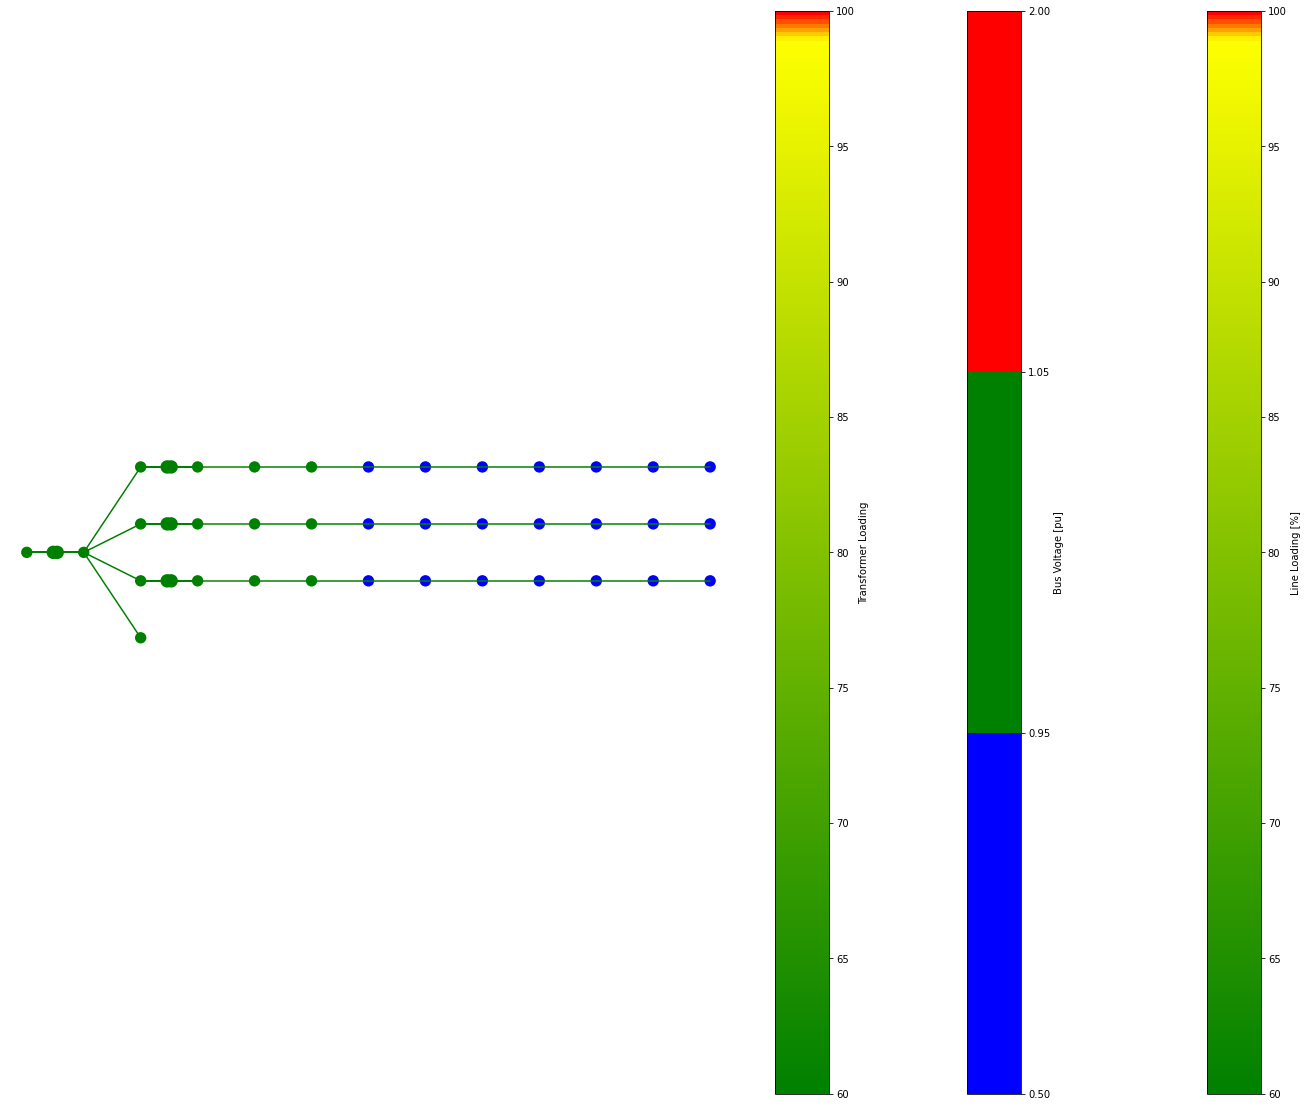

In [9]:

for x in range(len(net.load)):
    #Powerfactor stays the same, we can adjust the scaling to move the drawn power to the requested amount
    net.load.at[x, 'scaling'] = (0.02 + 0.07)/0.022

pp.runpp(net)

cmap_list = [((0.5, 0.95), "blue"), ((0.95, 1.05), "green"), ((1.05, 2), "red")]
cmap, norm = cmap_discrete(cmap_list)
bc = create_bus_collection(net, cmap=cmap, norm=norm, size=0.1)

cmap_list = [(60, "green"), ( 99, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
lc = plot.create_line_collection(net, cmap=cmap, norm=norm)

cmap_list = [(60, "green"), ( 99, "yellow"), (100, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
tc = plot.create_trafo_collection(net, cmap=cmap, norm=norm, size=0.1)
draw_collections([lc,bc,tc], figsize=(20,16))

for x in range(len(net.load)):
    #Powerfactor stays the same, we can adjust the scaling to move the drawn power to the requested amount
    net.load.at[x, 'scaling'] = 1

No, the later houses in the system do not get the correct voltage anymore, as can be seen by the blue colored dots. 
One way to mitigate this issue would be to install smart chargers for the electric cars. If they can communicate between each other they can reduce the powerdraw, before any houshold on the line runs into voltage issues.

# 3 Short circuit analysis
## 1) Compute the maximum three-phase short-circuit currents for a solid fault (ZF=0 Ω). 
### a. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus. 

In [10]:
sc.calc_sc(net, case="max", ip=True, ith=True, branch_results=True)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers


,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.587848,100.000000,1.100741,0.590740,43.969642,125.627547
1,2.391179,70.832867,4.770408,2.407425,1.517492,6.023599
2,2.072143,59.781143,3.578809,2.079945,3.082492,6.683599
3,1.950672,57.783918,3.324490,1.957491,3.395492,6.815599
4,1.886066,55.870123,3.163606,1.892239,3.708492,6.947599
5,1.950672,57.783918,3.324490,1.957491,3.395492,6.815599
6,10.917028,6.467809,21.444482,10.986104,0.007113,0.026265
7,10.883470,6.447927,21.306663,10.951297,0.007239,0.026318
8,10.917028,6.467809,21.444482,10.986104,0.007113,0.026265
9,3.410214,2.020386,5.021827,3.415835,0.066503,0.056265


### b. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line.

In [11]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,3.410214,5.021827,3.415835
1,1.946556,2.828877,1.949389
2,1.358094,1.966985,1.359996
3,1.042138,1.507181,1.043572
4,0.845248,1.221470,0.846399
5,0.710859,1.026763,0.711821
6,0.613309,0.885570,0.614136
7,0.539286,0.778501,0.540010
8,0.481198,0.694522,0.481843
9,3.405145,5.013973,3.410753


 ### c. What is the difference between the three values of current computed at each node or line? 
The three presented current are:
* ikss (Initial symmetrical short-circuit current)
* ip (short-circuit current peak)
* ith (equivalent thermal short-circuit current)

The ikss is the R.M.S. short circuit current. This means it's the effective short circuit current, if we were in a DC system.
The ip is the absolut maximum current that flowed through the system at any one point in time.
The ith gives the current, that if it were applied to the cable, would result in the same amount of heating up due to the power loss within the cable.
### d. Which standard is used to compute the short-circuit currents? Briefly explain the methodology based on the documentation, the slides of the course, and material you find online. 
The superposition method is used. First the steady state, meaning all voltages and current before the fault are calculated. The second step changes the fault location to a powersource with a negative sign of the previously calculated power at it's location. This will be the only power source in the network for this calculation. Both networks are then superimposed ontop of each other. 
## 2) Deactivate the contribution of the large motor and re-compute the maximum three-phase short-circuit currents for a solid fault (ZF=0 Ω). 
### a. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus. 

In [18]:
net.sgen.in_service = False
sc.calc_sc(net, case="max", ip=True, ith=True, branch_results=True)
net.res_bus_sc
net.sgen.in_service = True

Branch results are in beta mode and might not always be reliable, especially for transformers


### b. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line. 

In [13]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,2.916176,4.323152,2.920983
1,1.664558,2.430072,1.666981
2,1.161347,1.688742,1.162973
3,0.891163,1.293671,0.892389
4,0.722797,1.048298,0.723782
5,0.607877,0.881124,0.608700
6,0.524459,0.759917,0.525166
7,0.461159,0.668014,0.461779
8,0.411487,0.595936,0.412039
9,2.911841,4.316336,2.916637


### c. Compare to the values of Task 1 and explain the difference. 
The currents in this task are all reduced with with exception of the line with the motor, which has stayed the same. 
The special case can be explained by considering that it does make a difference if the motor is off, if the fault occurs at the motor. The general decrease is because in the case of a fault the motor would act for a short period of time as a generator and would act as a generator. This isn't the case while it's deactivated.
## 3) Compute the maximum three-phase short-circuit currents with fault impedance ZF=1+j1.5 Ω. 
### a. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus. 


In [14]:
sc.calc_sc(net, case="max", ip=True, ith=True, branch_results=True, r_fault_ohm=1., x_fault_ohm=1.5)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers


,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.581048,98.704543,1.089462,0.583927,44.969642,127.127547
1,1.947408,55.460188,3.823886,1.960353,2.517492,7.523599
2,1.735275,48.111706,3.088454,1.742936,4.082492,8.183599
3,1.633002,46.779523,2.884866,1.639795,4.395492,8.315599
4,1.586590,45.495973,2.766958,1.592839,4.708492,8.447599
5,1.633002,46.779523,2.884866,1.639795,4.395492,8.315599
6,1.720473,0.096249,2.523551,1.731525,1.007113,1.526265
7,1.715603,0.096243,2.516650,1.726623,1.007239,1.526318
8,1.720473,0.096249,2.523551,1.731525,1.007113,1.526265
9,0.628687,0.093288,0.973422,0.632534,1.066503,1.556265


### b. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line. 

In [15]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,0.628687,0.973422,0.632534
1,0.412592,0.662225,0.415004
2,0.323492,0.531095,0.325304
3,0.274063,0.456491,0.275538
4,0.242065,0.406920,0.243319
5,0.219292,0.370741,0.220388
6,0.202016,0.342648,0.202991
7,0.188298,0.319873,0.189178
8,0.177030,0.300820,0.177832
9,0.627945,0.972360,0.631787


### c. Compare to the values of Task 1 and explain the difference. 
All the short circuit currents are significantly lower than the in the case of a hard fault. This is because previously only the internal resistance of the power lines were limiting the current, while now there is additionally the fault resitance.
## 4) Compute the maximum two-phase short-circuit currents for a solid fault (ZF=0 Ω). 
### a. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus. 


In [16]:
sc.calc_sc(net, fault="2ph", case="max", ip=True, ith=True, branch_results=True)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers


,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.517529,28.867513,0.965203,0.520076,43.969642,125.627547
1,2.117232,20.447687,4.196928,2.131617,1.517492,6.023599
2,1.840939,17.257330,3.164973,1.847870,3.082492,6.683599
3,1.727192,16.680780,2.932635,1.733230,3.395492,6.815599
4,1.669988,16.128315,2.791533,1.675453,3.708492,6.947599
5,1.727192,16.680780,2.932635,1.733230,3.395492,6.815599
6,9.666311,1.867096,18.871120,9.727473,0.007113,0.026265
7,9.636598,1.861356,18.750845,9.696654,0.007239,0.026318
8,9.666311,1.867096,18.871120,9.727473,0.007113,0.026265
9,3.019521,0.583235,4.442634,3.024498,0.066503,0.056265


### b. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line. 


In [17]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,3.019521,4.442634,3.024498
1,1.723547,2.503309,1.726056
2,1.202503,1.740736,1.204187
3,0.922744,1.333862,0.924014
4,0.748411,1.081025,0.749431
5,0.629419,0.908715,0.630271
6,0.543045,0.783760,0.543777
7,0.477502,0.689004,0.478144
8,0.426069,0.614682,0.426640
9,3.015032,4.435693,3.019998


### c. Compare to the values of Task 1 and explain the difference.
The short circuit current is reduced if the short circuit only happened between two phases. Some of the power running throught he cables still uses the third cable, which is not short circuited.